In [42]:
__author__="Matt Gomer"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rc('image', cmap='gray')
import scipy
from scipy import signal
from scipy import fftpack

1496


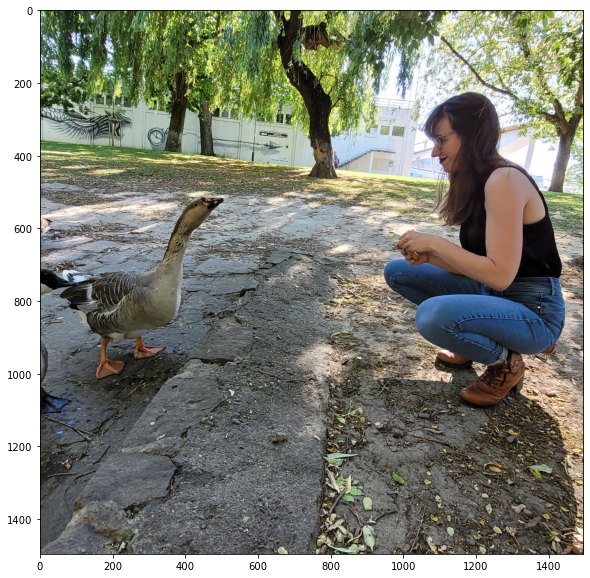

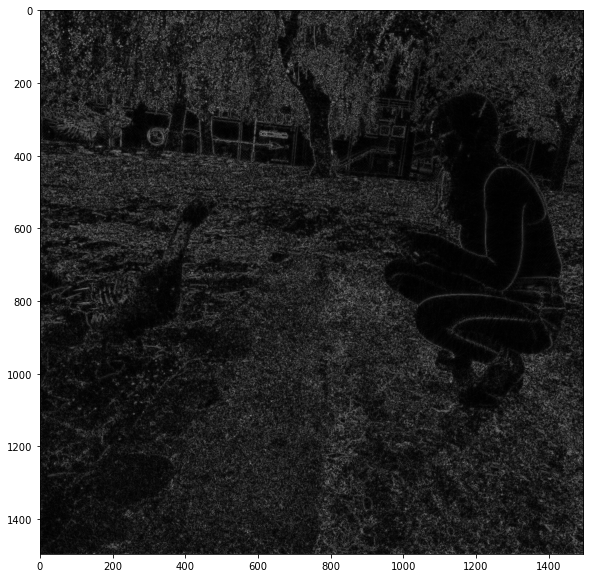

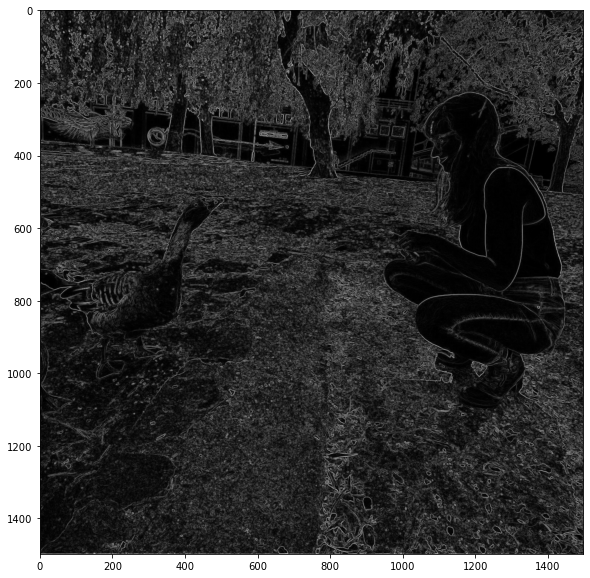

In [105]:
source_image=mpimg.imread('images/goose.jpg')
# source_image=source_image[200:1400,:]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(source_image)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


#need edge detection to calculate energy
#is there a difference between sobel fiter and high pass filter?
def high_pass_fft_filter(img,filter_rad):
    img_height=np.shape(img)[0]
    print(img_height)
    img_width=np.shape(img)[1]
    F = fftpack.fftshift( fftpack.fft2(img))
    x_range=np.arange(0,img_width)
    y_range=np.arange(0,img_height)
    x_grid,y_grid=np.meshgrid(x_range,y_range)
    x_shift = x_grid - int(img_width/2)
    y_shift = y_grid - int(img_height/2)
    R = np.sqrt(x_shift*x_shift + y_shift*y_shift)
    mask = np.empty_like(R)
    mask[R > filter_rad] = 1
    mask[R <= filter_rad] = 0
    filt_fft=mask*F
    filtered_img = fftpack.ifft2(filt_fft)
    if np.all(np.imag(filtered_img)<10**-13):
        filtered_img=np.abs(filtered_img)
    else:
        print('Error: problem with fft: output is complex')
    return filtered_img

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(high_pass_fft_filter(rgb2gray(source_image),200))
#sobel filter

def partial_derivatives(img, grad_x=True, grad_y=True):
    Gx,Gy=np.zeros_like(img),np.zeros_like(img)
    Sx=np.array([[-0.125, 0, 0.125],
    [-0.25, 0, 0.25],
    [-0.125, 0, 0.125]])
    Sy=np.array([[-0.125, -0.25, -0.125],
    [0, 0, 0],
    [0.125, 0.25, 0.125]])
    if grad_x:
        Gx=signal.convolve2d(rgb2gray(source_image),Sx)
    if grad_y:
        Gy=signal.convolve2d(rgb2gray(source_image),Sy)
    return(Gx,Gy)

Gx,Gy=partial_derivatives(rgb2gray(source_image))
grad=np.sqrt(Gx**2+Gy**2)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(grad)
#future exploration: what is a Scharr kernel? How can it be complex?
    
#need way to sum up minimal energy

#need function to trim off pixels

#need animation with slider to trim



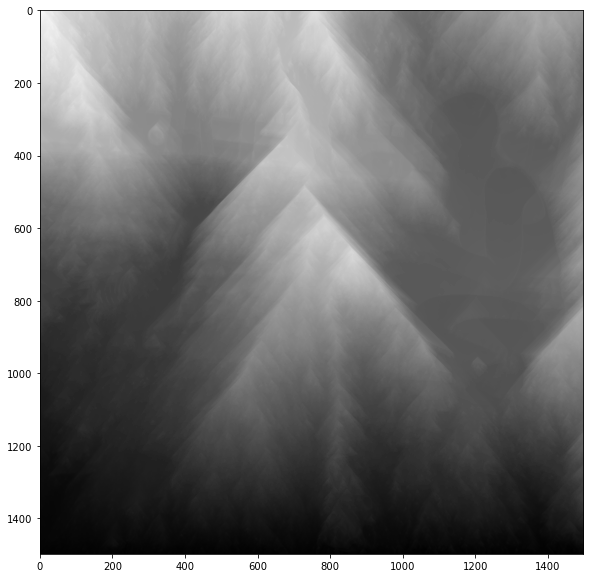

In [106]:

def energ(grad,shrink_axis='x'): #this is slow. is there a more pythonic way?
    energ=np.zeros_like(grad)
    row_from_bottom=0
    for row_from_bottom in np.arange(np.shape(energ)[0]):
        if row_from_bottom==0:
            current_row=grad[-1-row_from_bottom,:]
            energ[-1-row_from_bottom,:]=current_row
            continue
        previous_row=energ[-row_from_bottom,:]
        current_row=grad[-1-row_from_bottom,:]

        for ix, value in enumerate(current_row-1):
            if ix==0:
                energ[-1-row_from_bottom,ix]=np.minimum(previous_row[0],previous_row[1])+value
            elif ix==len(current_row)-1:
                energ[-1-row_from_bottom,ix]=np.minimum(previous_row[-1],previous_row[-2])+value
            else:
#                 print(np.min([previous_row[ix-1],previous_row[ix],previous_row[ix+1]]))
                energ[-1-row_from_bottom,ix]=np.min([previous_row[ix-1],previous_row[ix],previous_row[ix+1]])+value
    return energ
                
        #for each pixel, check 3 from row below, add minimum
        
energy_arr=energ(grad)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(energy_arr)

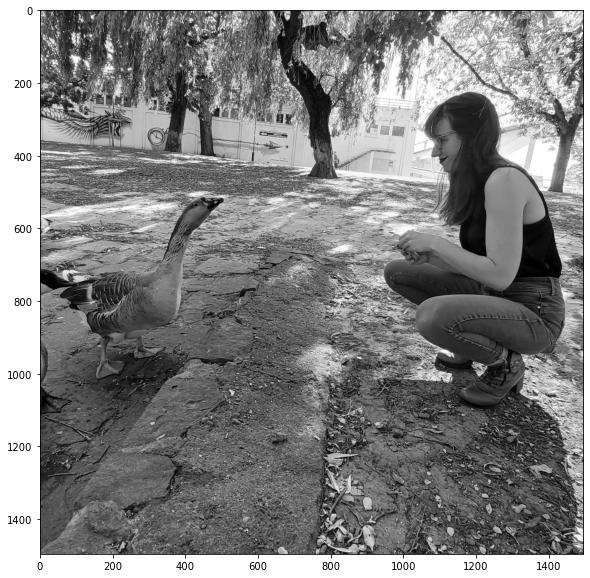

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(rgb2gray(source_image))